***Project Description:***

This project aims to simulate and visualize the relationship between daily average temperature and energy consumption in Dubai, UAE, using both synthetic and real weather data. It leverages Python libraries like NumPy, Pandas, Matplotlib, Meteostat, and Dash to achieve this.



***Key Features and Functionalities:***

Synthetic Data Simulation: The project first simulates daily temperature and energy consumption patterns using a sine wave to model seasonal temperature variations and a model where energy consumption increases with higher temperatures due to air conditioning demands. Random noise is added for realistic daily fluctuations.



Real Weather Data Integration: Using the Meteostat library, the project fetches real weather data for Dubai, including daily average temperatures. It then simulates energy consumption based on this actual temperature data.




Visualization: The simulated and actual data are visualized through various plots, including:



Daily average temperature plots
Daily energy consumption plots
Scatter plots depicting the relationship between temperature and energy consumption
Overlay plots showcasing temperature and energy consumption trends on a single graph
Interactive Dashboard (using Dash): The project culminates in developing an interactive web dashboard that allows users to explore the simulated and actual data. This dashboard features charts and graphs that update dynamically, providing insights into the temperature-energy dynamics in Dubai.




***Overall Goals and Objectives:***

The project aims to provide a comprehensive understanding of how temperature influences energy consumption in Dubai. By using both synthetic and real data, it explores the seasonal and daily trends in these two variables. The visualizations and interactive dashboard enable users to effectively analyze the patterns and relationships, potentially informing strategies for energy optimization and consumption management.




***Libraries Used:***

NumPy: For numerical calculations
Pandas: For data handling and manipulation
Matplotlib: For plotting and visualization
Meteostat: For fetching weather data
Dash: For building the interactive dashboard
Plotly: For creating interactive charts within the dashboard

*** Simulation and Visualization of Daily Temperature and Energy Consumption***

 The code-functions simulates the daily average temperature and energy consumption in the UAE over the past year. It utilizes the numpy, pandas, matplotlib, and datetime libraries for numerical calculations, data handling, plotting, and date/time manipulation, respectively.


 The simulation generates synthetic temperature data by modeling seasonal variations using a sine wave and incorporating random noise for daily fluctuations. Energy consumption is then simulated based on the temperature, assuming a baseline consumption with increased usage at higher temperatures due to air conditioning demands.


 The simulated data is organized into a pandas DataFrame with columns for 'Date', 'Temperature', and 'EnergyConsumption', and subsequently visualized through three plots: a daily average temperature plot, a daily energy consumption plot, and a scatter plot depicting the relationship between temperature and energy consumption. Finally, the simulated data is returned as a pandas DataFrame for potential further analysis.

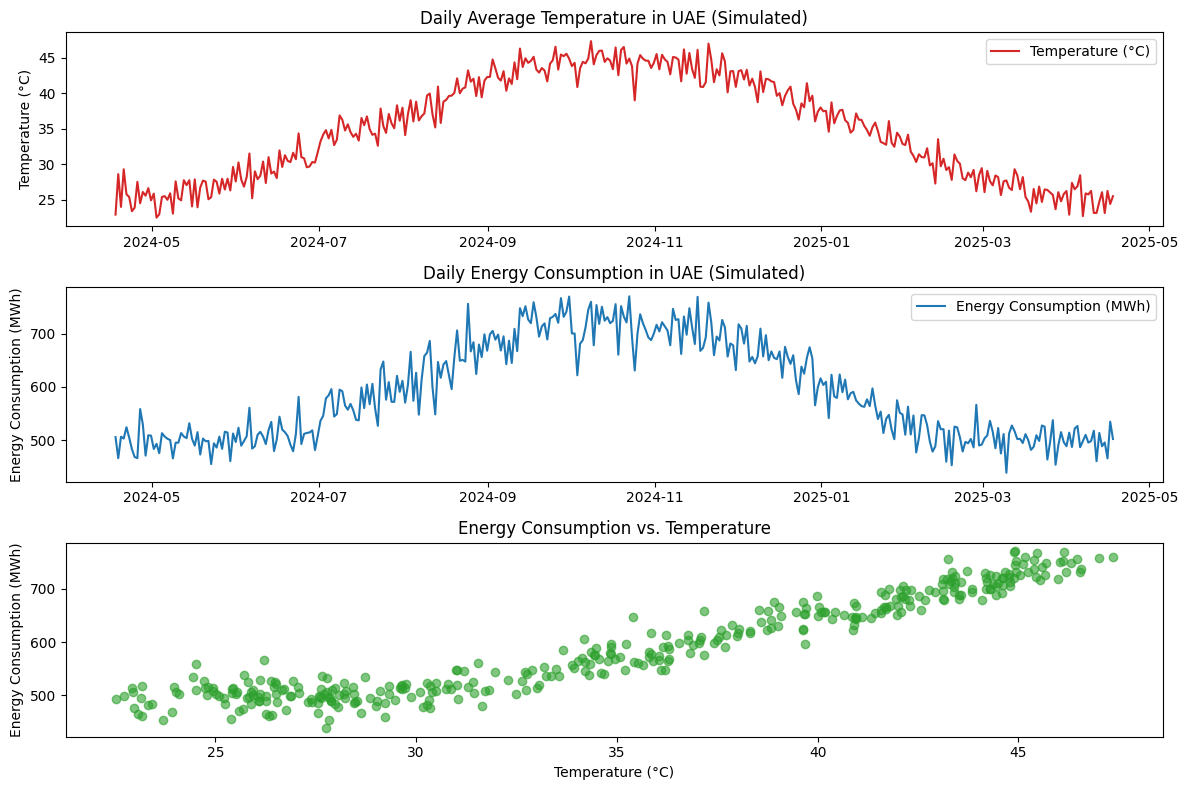

In [ ]:
# Simulation and Visualization of Daily Temperature and Energy Consumption
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def simulate_system_dynamics():
    # Set the simulation period (past year)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Number of days
    n = len(dates)

    # Generate synthetic daily average temperature data (in °C)
    # UAE has high temperatures especially in summer; we simulate a seasonal pattern using a sine wave plus random noise.
    # Here, the sine wave mimics a yearly cycle with a peak in summer and a trough in winter.
    # We shift and scale the sine wave so temperatures roughly range between 25°C and 45°C.
    day_of_year = np.arange(n)
    seasonal_temp = 10 * np.sin(2 * np.pi * day_of_year / n - np.pi/2) + 35  # oscillates around 35°C with amplitude 10
    noise_temp = np.random.normal(0, 1.5, n)  # small daily fluctuations
    temperature = seasonal_temp + noise_temp

    # Generate synthetic energy consumption data (in Megawatt-hours, MWh)
    # We assume energy consumption increases with higher temperatures (more AC usage).
    # A baseline consumption plus a multiplier on the temperature deviation from a reference value is used.
    baseline = 500  # baseline consumption in MWh
    # Increase in consumption per degree above a reference (say 30°C)
    consumption = baseline + 15 * np.maximum(0, temperature - 30)
    noise_consumption = np.random.normal(0, 20, n)  # add some random variation
    energy_consumption = consumption + noise_consumption

    # Create a DataFrame for easier handling
    data = pd.DataFrame({
        'Date': dates,
        'Temperature': temperature,
        'EnergyConsumption': energy_consumption
    })
    data.set_index('Date', inplace=True)

    # Plot the simulated data
    plt.figure(figsize=(12, 8))

    # Temperature over time
    plt.subplot(3, 1, 1)
    plt.plot(data.index, data['Temperature'], label='Temperature (°C)', color='tab:red')
    plt.title('Daily Average Temperature in UAE (Simulated)')
    plt.ylabel('Temperature (°C)')
    plt.legend()

    # Energy consumption over time
    plt.subplot(3, 1, 2)
    plt.plot(data.index, data['EnergyConsumption'], label='Energy Consumption (MWh)', color='tab:blue')
    plt.title('Daily Energy Consumption in UAE (Simulated)')
    plt.ylabel('Energy Consumption (MWh)')
    plt.legend()

    # Scatter plot: Temperature vs. Energy Consumption
    plt.subplot(3, 1, 3)
    plt.scatter(data['Temperature'], data['EnergyConsumption'], alpha=0.6, color='tab:green')
    plt.title('Energy Consumption vs. Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Energy Consumption (MWh)')

    plt.tight_layout()
    plt.show()

    # Return the simulated data in case further analysis is desired
    return data

# Execute the function in the environment
simulated_data = simulate_system_dynamics()

**Overlay Plot of Daily Temperature and Energy Consumption**

This code-function simulates daily temperature and energy consumption patterns in the UAE using a sine wave to represent seasonal temperature variations and a model where energy consumption increases with higher temperatures. It then creates an overlay plot with two y-axes, one for temperature and one for energy consumption, to visualize the relationship between these two variables over the simulated year.


It first imports necessary libraries (numpy, pandas, matplotlib, datetime). It then defines a function simulate_and_overlay that simulates daily temperatures using a sine wave with random noise, and energy consumption based on a baseline value plus an increase proportional to temperatures above 30°C. This simulated data is stored in a pandas DataFrame. The function then creates an overlay plot using matplotlib, displaying temperature on the left y-axis and energy consumption on the right y-axis, both against the date on the x-axis. This plot visually demonstrates the correlation between temperature fluctuations and energy consumption in the UAE.


Finally, the function returns the simulated data for potential further analysis. The last line of the code executes this function, generating the simulation and displaying the overlay plot.

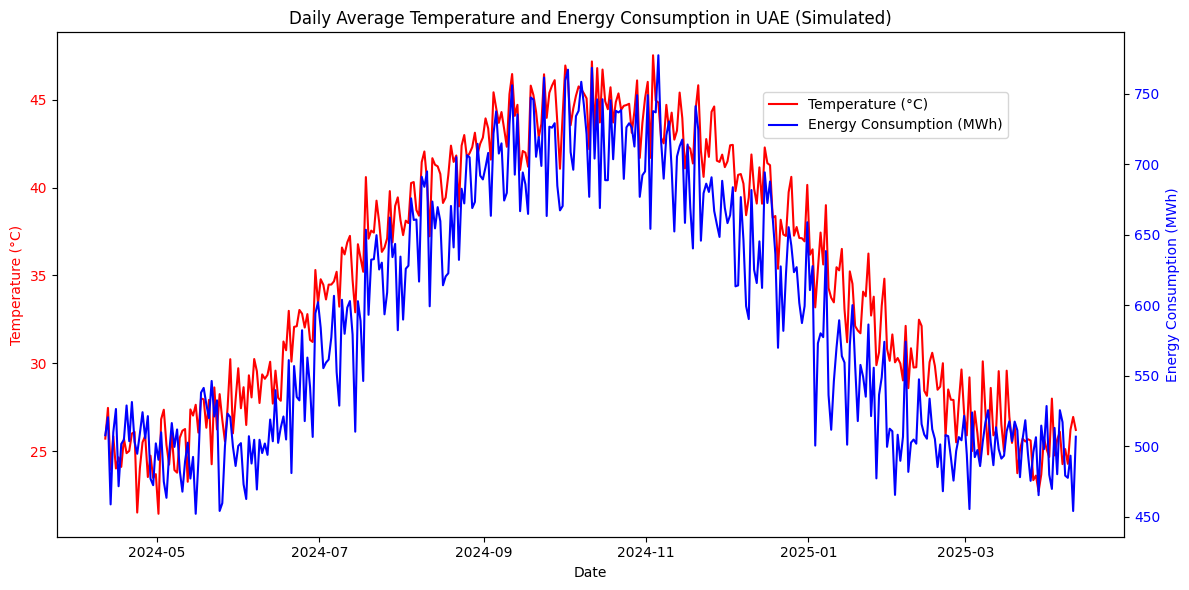

In [ ]:
# Overlay Plot of Daily Temperature and Energy Consumption
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def simulate_and_overlay():
    # Define the simulation period: past year
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    n = len(dates)

    # Simulate daily average temperature (°C) using a sine wave (seasonality) plus noise
    day_of_year = np.arange(n)
    seasonal_temp = 10 * np.sin(2 * np.pi * day_of_year / n - np.pi/2) + 35  # oscillates around 35°C
    noise_temp = np.random.normal(0, 1.5, n)
    temperature = seasonal_temp + noise_temp

    # Simulate daily energy consumption (MWh) that increases on hotter days (above 30°C)
    baseline = 500  # baseline consumption in MWh
    consumption = baseline + 15 * np.maximum(0, temperature - 30)
    noise_consumption = np.random.normal(0, 20, n)
    energy_consumption = consumption + noise_consumption

    # Create a DataFrame to store the simulated data
    data = pd.DataFrame({
        'Date': dates,
        'Temperature': temperature,
        'EnergyConsumption': energy_consumption
    })
    data.set_index('Date', inplace=True)

    # Create an overlay plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot temperature on the primary y-axis (left)
    ax1.plot(data.index, data['Temperature'], 'r-', label='Temperature (°C)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    # Create a secondary y-axis for energy consumption (right)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['EnergyConsumption'], 'b-', label='Energy Consumption (MWh)')
    ax2.set_ylabel('Energy Consumption (MWh)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    # Set plot title and add a combined legend
    plt.title('Daily Average Temperature and Energy Consumption in UAE (Simulated)')
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

    plt.tight_layout()
    plt.show()

    # Return the simulated data in case further analysis is desired
    return data

# Execute the simulation and overlay plot function
data_overlay = simulate_and_overlay()

*** Simulating Energy Consumption in Dubai using Real Weather Data and Visualization***

This code defines a function named simulate_system_dynamics that simulates daily average temperature and energy consumption patterns in the UAE over the past year. It begins by setting the simulation period using the datetime and timedelta objects to establish a range of dates for the past 365 days.


It then simulates daily temperatures using a sine wave to represent seasonal variations, incorporating random noise for realistic daily fluctuations. Next, the function simulates daily energy consumption, assuming a baseline value with increased usage at higher temperatures due to air conditioning demands.


This simulated temperature and energy consumption data is organized into a pandas DataFrame for easier handling and analysis. Finally, the function creates three plots: a daily average temperature plot, a daily energy consumption plot, and a scatter plot showing the relationship between temperature and energy consumption. These plots visualize the simulated data, providing insights into daily and seasonal trends.


The function concludes by returning the simulated data in a DataFrame, allowing for potential further analysis or use in other parts of the program. Overall, this function offers a self-contained simulation and visualization tool for exploring temperature and energy consumption dynamics in the UAE context.

In [ ]:
pip install meteostat

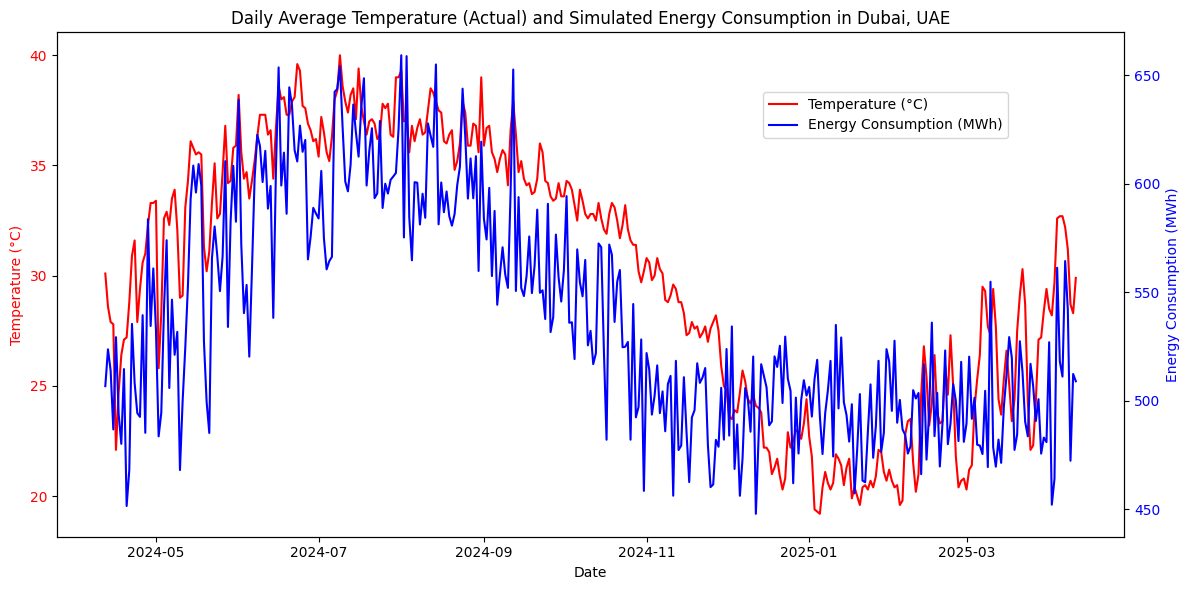

            Temperature  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                         
2024-04-12         30.1  27.5  34.6   0.8   NaN  268.0  12.9   NaN  1006.8   
2024-04-13         28.6  26.0  33.8   0.0   NaN  266.0  13.5   NaN  1006.8   
2024-04-14         27.9  24.8  31.2   0.0   NaN  253.0  14.5   NaN  1008.1   
2024-04-15         27.8  24.0  34.2   0.0   NaN  128.0  13.0   NaN  1009.5   
2024-04-16         22.1  19.5  27.0  97.0   NaN   90.0  22.8   NaN  1007.4   

            tsun  EnergyConsumption  
time                                 
2024-04-12   NaN         506.734757  
2024-04-13   NaN         523.703407  
2024-04-14   NaN         513.948072  
2024-04-15   NaN         486.785799  
2024-04-16   NaN         529.309191  


In [ ]:
# Simulating Energy Consumption in Dubai using Real Weather Data and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from meteostat import Point, Daily

# Define location for Dubai International Airport (latitude, longitude, altitude in meters)
dubai = Point(25.252, 55.364, 16)

# Define the time period: past year
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch daily weather data from Meteostat
weather_data = Daily(dubai, start_date, end_date)
weather_data = weather_data.fetch()

# Meteostat may not always have an average temperature column; if not, we calculate it
if 'tavg' not in weather_data.columns:
    if 'tmin' in weather_data.columns and 'tmax' in weather_data.columns:
        weather_data['tavg'] = (weather_data['tmin'] + weather_data['tmax']) / 2

# Drop any days with missing temperature values
weather_data = weather_data.dropna(subset=['tavg'])

# Rename the temperature column for clarity
weather_data = weather_data.rename(columns={'tavg': 'Temperature'})

# Simulate energy consumption:
# Baseline consumption is 500 MWh; add 15*(Temperature - 30) for days above 30°C plus some random noise.
baseline = 500
temp_values = weather_data['Temperature'].values
consumption = baseline + 15 * np.maximum(0, temp_values - 30)
noise = np.random.normal(0, 20, len(temp_values))
energy_consumption = consumption + noise

# Add the simulated energy consumption to the DataFrame
weather_data['EnergyConsumption'] = energy_consumption

# Create an overlay plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot actual temperature data (in °C) on the left y-axis
ax1.plot(weather_data.index, weather_data['Temperature'], 'r-', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for energy consumption (in MWh)
ax2 = ax1.twinx()
ax2.plot(weather_data.index, weather_data['EnergyConsumption'], 'b-', label='Energy Consumption (MWh)')
ax2.set_ylabel('Energy Consumption (MWh)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add title and legend
plt.title('Daily Average Temperature (Actual) and Simulated Energy Consumption in Dubai, UAE')
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
plt.tight_layout()
plt.show()

# Display the first few rows of the resulting data
print(weather_data.head())

***Developing a Dashboard to Explore Temperature-Energy Dynamics in Dubai using Dash***


This code block constructs an interactive web dashboard using the Dash framework to visualize weather data for Dubai and simulate energy consumption based on temperature. It begins by initializing a Dash application instance and setting its title to "Weather & Energy Dynamics Dashboard.


" The core of the dashboard's structure is defined within the app.layout property, using an html.Div as the main container. Inside this container, a level 1 heading displays the title, followed by a brief description of the dashboard's purpose. Four interactive charts are then defined using dcc.Graph components, each with a unique ID and a figure property that specifies the data and appearance using plotly.graph_objects. These charts include an overlay of temperature and simulated energy consumption, separate charts for daily average temperature and energy consumption, and a scatter plot comparing these two variables.


Finally, the code ensures that when the script is run directly, it starts the Dash development server, making the dashboard accessible in a web browser with debug mode enabled for convenient development. In essence, this code creates a dynamic and interactive platform for exploring the relationship between weather and energy consumption in Dubai.

In [ ]:
pip install dash plotly meteostat pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from meteostat import Point, Daily

# ----------------------------
# Function to fetch weather data
# ----------------------------
def fetch_weather_data():
    # Define a location for Dubai International Airport (latitude, longitude, elevation)
    dubai = Point(25.252, 55.364, 16)

    # Define the date range for the past year
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)

    # Fetch daily weather data using Meteostat API
    data = Daily(dubai, start_date, end_date).fetch()

    # If average temperature is not provided, compute it from minimum and maximum
    if 'tavg' not in data.columns:
        if 'tmin' in data.columns and 'tmax' in data.columns:
            data['tavg'] = (data['tmin'] + data['tmax']) / 2

    # Rename column to 'Temperature' for clarity and drop any NaN values
    data = data.rename(columns={'tavg': 'Temperature'})
    data = data.dropna(subset=['Temperature'])
    return data

# ----------------------------
# Function to simulate energy consumption
# ----------------------------
def simulate_energy_consumption(data):
    baseline = 500  # baseline energy consumption (MWh)
    temp_values = data['Temperature'].values
    # Increase consumption for temperatures above 30°C, plus random noise
    consumption = baseline + 15 * np.maximum(0, temp_values - 30)
    noise = np.random.normal(0, 20, len(temp_values))
    data['EnergyConsumption'] = consumption + noise
    return data

# ----------------------------
# Fetch and prepare data
# ----------------------------
weather_data = fetch_weather_data()
weather_data = simulate_energy_consumption(weather_data)

# ----------------------------
# Build Dash App
# ----------------------------
app = dash.Dash(__name__)
app.title = "Weather & Energy Dynamics Dashboard"

# Dashboard Layout
app.layout = html.Div([
    html.H1("Weather & Energy Consumption Dynamics in Dubai, UAE"),
    html.Div("This dashboard displays real weather data (fetched using Meteostat) and simulates energy consumption based on the temperature."),

    # Dual-axis Overlay Chart: Temperature and Energy Consumption
    dcc.Graph(
        id='overlay-graph',
        figure=go.Figure(
            data=[
                go.Scatter(
                    x=weather_data.index,
                    y=weather_data['Temperature'],
                    name='Temperature (°C)',
                    mode='lines',
                    line=dict(color='red')
                ),
                go.Scatter(
                    x=weather_data.index,
                    y=weather_data['EnergyConsumption'],
                    name='Energy Consumption (MWh)',
                    mode='lines',
                    line=dict(color='blue'),
                    yaxis='y2'
                )
            ],
            layout=go.Layout(
                title='Overlay: Temperature & Simulated Energy Consumption',
                xaxis=dict(title='Date'),
                yaxis=dict(
                    title='Temperature (°C)',
                    titlefont=dict(color='red'),
                    tickfont=dict(color='red')
                ),
                yaxis2=dict(
                    title='Energy Consumption (MWh)',
                    titlefont=dict(color='blue'),
                    tickfont=dict(color='blue'),
                    overlaying='y',
                    side='right'
                ),
                legend=dict(x=0.01, y=0.99),
                margin=dict(l=50, r=50, t=50, b=50)
            )
        )
    ),

    # Temperature Trend Chart
    dcc.Graph(
        id='temperature-trend',
        figure=go.Figure(
            data=[
                go.Scatter(
                    x=weather_data.index,
                    y=weather_data['Temperature'],
                    mode='lines',
                    name='Temperature (°C)',
                    line=dict(color='firebrick')
                )
            ],
            layout=go.Layout(
                title='Daily Average Temperature in Dubai',
                xaxis=dict(title='Date'),
                yaxis=dict(title='Temperature (°C)'),
                margin=dict(l=50, r=50, t=50, b=50)
            )
        )
    ),

    # Energy Consumption Trend Chart
    dcc.Graph(
        id='energy-trend',
        figure=go.Figure(
            data=[
                go.Scatter(
                    x=weather_data.index,
                    y=weather_data['EnergyConsumption'],
                    mode='lines',
                    name='Energy Consumption (MWh)',
                    line=dict(color='royalblue')
                )
            ],
            layout=go.Layout(
                title='Simulated Daily Energy Consumption in Dubai',
                xaxis=dict(title='Date'),
                yaxis=dict(title='Energy Consumption (MWh)'),
                margin=dict(l=50, r=50, t=50, b=50)
            )
        )
    ),

    # Scatter Plot: Temperature vs Energy Consumption
    dcc.Graph(
        id='scatter-plot',
        figure=go.Figure(
            data=[
                go.Scatter(
                    x=weather_data['Temperature'],
                    y=weather_data['EnergyConsumption'],
                    mode='markers',
                    name='Data Points',
                    marker=dict(color='seagreen')
                )
            ],
            layout=go.Layout(
                title='Scatter Plot: Temperature vs Energy Consumption',
                xaxis=dict(title='Temperature (°C)'),
                yaxis=dict(title='Energy Consumption (MWh)'),
                margin=dict(l=50, r=50, t=50, b=50)
            )
        )
    )
])

# ----------------------------
# Run the Dash App
# ----------------------------
#if __name__ == '__main__':
    #app.run_server(debug=True)

# ----------------------------
# Run the Dash App
# ----------------------------
if __name__ == '__main__':
    app.run(debug=True) # Changed from app.run_server to app.run





<IPython.core.display.Javascript object>